<center>
    <h1>Inteligencia Artificial</h1>
    <h1>PyTorch</h1>
    <br>
    <h5>Prof. Wladimir Rodríguez</h5>
    <h5>wladimir.rodriguez@outlook.com</h5>
    <h5>Departamento de Computación</h5>
</center>

![](../figuras/PyTorch.png)

# ¿Qué es [PyTorch](www.pytorch.org)?

Es un paquete de computación científica basado en Python dirigido a dos conjuntos de
audiencias:
- Un reemplazo para NumPy para usar el poder de las GPU
- Una plataforma de investigación de aprendizaje profundo que proporciona la máxima flexibilidad
    y velocidad
    
## Empezando

### Tensores

Los tensores son similares a los `ndarrays` de NumPy, con la adición de que los tensores también se pueden usar en una GPU para acelerar la computaciȯn.


In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from time import time
%matplotlib inline
torch.__version__

'1.4.0'

Nota

> Se declara una matriz no inicializada, pero no contiene valores conocidos definidos antes de ser utilizada. Cuando se crea una matriz no inicializada, los valores que estaban en la memoria asignada en ese momento aparecerán como valores iniciales.

Construya una matriz de 5x3, sin inicializar:

In [2]:
x = torch.empty(5, 3)
x

tensor([[2.5889e-12, 4.5576e-41, 5.6512e-38],
        [3.0666e-41, 0.0000e+00, 0.0000e+00],
        [3.9096e-43, 3.0666e-41, 5.5586e-38],
        [3.0666e-41, 5.5586e-38, 3.0666e-41],
        [3.5032e-43, 0.0000e+00, 3.9376e-43]])

Construya una matriz inicializada al azar:

In [3]:
x = torch.rand(5, 3)
x

tensor([[0.1603, 0.2320, 0.7056],
        [0.1571, 0.4322, 0.5991],
        [0.7896, 0.1840, 0.1943],
        [0.8480, 0.8820, 0.5845],
        [0.1397, 0.9240, 0.1812]])

Construya una matriz llena de ceros y de `dtype long`:

In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

Construya un tensor directamente de los datos:

In [5]:
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

o crear un tensor basado en un tensor existente. Estos métodos reutilizarán las propiedades del tensor de entrada, a menos que el usuario proporcione nuevos valores

In [6]:
x = x.new_ones(5, 3, dtype=torch.double)    # los métodos new_* toman tamaños
print(x)
x = torch.rand_like(x, dtype=torch.float)   # cambiar dtype!
x                                           # el resultado tiene el mismo tamaño

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


tensor([[0.6306, 0.6906, 0.7795],
        [0.7156, 0.9895, 0.5812],
        [0.5263, 0.6495, 0.0716],
        [0.7275, 0.1763, 0.3134],
        [0.2281, 0.8006, 0.7141]])

Obtener su tamaño:

In [7]:
x.size()

torch.Size([5, 3])

Nota

> `torch.Size` es de hecho una tupla, por lo que admite todas las operaciones de tupla.

### Operaciones

Existen múltiples sintaxis para las operaciones. En el siguiente ejemplo, veremos la operación de adición.

Adición: sintaxis 1

In [8]:
y = torch.rand(5, 3)
x + y

tensor([[1.3952, 1.0348, 0.9814],
        [1.1302, 1.9312, 1.4676],
        [1.4077, 0.7895, 0.4333],
        [1.1837, 0.5409, 0.7567],
        [0.7298, 0.8062, 1.4674]])

Adición: sintaxis 2

In [9]:
torch.add(x, y)

tensor([[1.3952, 1.0348, 0.9814],
        [1.1302, 1.9312, 1.4676],
        [1.4077, 0.7895, 0.4333],
        [1.1837, 0.5409, 0.7567],
        [0.7298, 0.8062, 1.4674]])

Adición: proporcionar un tensor de salida como argumento

In [10]:
resultado = torch.empty(5, 3)
torch.add(x, y, out=resultado)
resultado

tensor([[1.3952, 1.0348, 0.9814],
        [1.1302, 1.9312, 1.4676],
        [1.4077, 0.7895, 0.4333],
        [1.1837, 0.5409, 0.7567],
        [0.7298, 0.8062, 1.4674]])

Adición: en sitio

In [11]:
y.add_(x)
y

tensor([[1.3952, 1.0348, 0.9814],
        [1.1302, 1.9312, 1.4676],
        [1.4077, 0.7895, 0.4333],
        [1.1837, 0.5409, 0.7567],
        [0.7298, 0.8062, 1.4674]])

Nota

> Cualquier operación que mute un tensor en el lugar se le coloca el postfijo \_. Por ejemplo: *x.copy_(y)*, *x.t_()*, cambiará *x*.

¡Puede usar la indexación NumPy estándar con todas las campanas y silbatos!

In [12]:
x[:, 1]

tensor([0.6906, 0.9895, 0.6495, 0.1763, 0.8006])

Cambio de tamaño: si desea cambiar el tamaño / remodelar el tensor, puede usar `torch.view`:

In [13]:
x = torch.rand(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


Si tiene un tensor de un elemento, use `.item()` para obtener el valor como un número de Python

In [14]:
x = torch.randn(1)
print(x)
x.item()

tensor([-0.8026])


-0.802563488483429

Leer mas tarde:

> [Aquí](https://pytorch.org/docs/stable/torch.html) se describen más de 100 operaciones de tensor, que incluyen transposición, indexación, corte, operaciones matemáticas, álgebra lineal, números aleatorios, etc.

### Puente NumPy

Convertir un Tensor Torch en una matriz NumPy y viceversa es muy fácil.

El Tensor Torch y la matriz NumPy compartirán sus ubicaciones de memoria subyacentes (si el Tensor Torch está en la CPU), y cambiar una cambiará la otra.
### Convertir un Tensor Torch en una matriz NumPy

In [15]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [16]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

Vea cómo la matriz numpy cambió de valor.

In [17]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### Conversión de matriz NumPy a Tensor Torch

Vea cómo cambiar la matriz NumPy cambió el Tensor Torch automáticamente

In [18]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


Todos los tensores en la CPU excepto un CharTensor admiten la conversión a NumPy y viceversa.

### Tensores CUDA

Los tensores se pueden mover a cualquier dispositivo utilizando el método `.to`.

In [19]:
# ejecutemos esta celda solo si CUDA está disponible
# Usaremos objetos ``torch.device`` para mover los tensores dentro y fuera de la GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # un objeto dispositivo CUDA
    y = torch.ones_like(x, device=device)  # crear directamente un tensor en la GPU
    x = x.to(device)                       # o usar la cadena ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double)) 

## Un problema de regresión simple

Vamos a comenzar a utilizar `PyTorch` con un problema sencillo de regresión lineal con una sola característica $x$. 

$$y = a +bx + \epsilon$$

## Generacion de datos

Comencemos generando algunos datos sintéticos: comenzamos con un vector de 100 puntos para nuestra característica $x$ y creamos nuestras etiquetas usando $a = 1$, $b = 2$ y algo de ruido gaussiano.

A continuación, dividamos nuestros datos sintéticos en conjuntos de entrenamiento y validación, barajando la matriz de índices y utilizando los primeros 80 puntos barajados para el entrenamiento.

In [20]:
# Generación de Datos
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Barajar los indices
indices = np.arange(100)
np.random.shuffle(indices)

# Usar los primeros 80 indices aleatorios para entrenamiento
indices_entrenamiento = indices[:80]
# Usar los indices restantes para validación
indices_validacion = indices[80:]

# Generar conjuntos de entrenamiento y validación
x_entrenamiento, y_entrenamiento = x[indices_entrenamiento], y[indices_entrenamiento]
x_validacion, y_validacion = x[indices_validacion], y[indices_validacion]

## Visualización de los conjuntos de datos

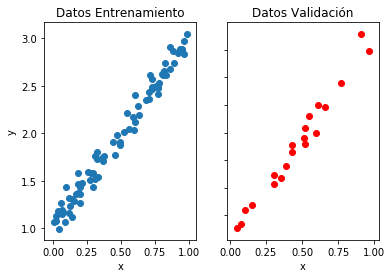

In [21]:
figura, axs = plt.subplots(1, 2)
axs[0].scatter(x_entrenamiento, y_entrenamiento)
axs[0].set(xlabel='x', ylabel='y')
axs[0].set_title('Datos Entrenamiento')
axs[1].scatter(x_validacion, y_validacion, c='red')
axs[1].set(xlabel='x', ylabel='y')
axs[1].set_title('Datos Validación')
for ax in axs.flat:
    ax.label_outer()

### Cargando datos, dispositivos y CUDA

Para convertir las matrices Numpy a tensores Pytorch usaremos `from_numpy`. Sin embargo, este método devuelve un tensor de CPU.

Si queremos utilizar la GPU podemos usar el método `to()`. Envía un tensor a cualquier dispositivo que especifique, incluida la GPU (denominada `cuda` o `cuda:0`).

Para hacer que el código use la CPU en caso de que no tengamos disponible una GPU se puede usar `cuda.is_available()` para averiguar si tiene una GPU a su disposición y configura tu dispositivo en consecuencia.

También puede convertirlo fácilmente a una precisión menor (flotante de 32 bits) utilizando `float()`.

In [22]:
dispositivo = 'cuda' if torch.cuda.is_available() else 'cpu'

# Nuestros datos estaban en matrices Numpy, pero tenemos que transformarlos en los tensores de PyTorch
# y luego los enviamos al dispositivo elegido
x_entrenamiento_tensor = torch.from_numpy(x_entrenamiento).float().to(dispositivo)
y_entrenamiento_tensor = torch.from_numpy(y_entrenamiento).float().to(dispositivo)

# Aquí podemos ver la diferencia: observe que .type() es más útil
# ya que también nos dice DÓNDE está el tensor (device)
print(type(x_entrenamiento), type(x_entrenamiento_tensor), x_entrenamiento_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


Si comparamos los tipos de ambas variables, obtendrá lo que esperaría: `numpy.ndarray` para la primera y `torch.Tensor` para la segunda.

El tipo de dato de un tensor de GPU sería `torch.cuda.FloatTensor`.

También podemos dar la vuelta, volviendo los tensores a matrices Numpy, usando `numpy()`. Debería ser fácil como `x_train_tensor.numpy()` pero ...

> TypeError: no se puede convertir el tensor CUDA en numpy. Use `Tensor.cpu()` para copiar primero el tensor a la memoria del host.

Desafortunadamente, Numpy no puede manejar los tensores de GPU ... primero debe hacer que sean tensores de CPU usando `cpu()`.

### Creando Parámetros

¿Qué distingue un tensor utilizado para datos, como los que acabamos de crear, de un tensor utilizado como parámetro / peso (entrenable)?

Los últimos tensores requieren el cálculo de sus gradientes, por lo que podemos actualizar sus valores (los valores de los parámetros, es decir). Para eso es necesario el argumento `require_grad = True`. Le dice a PyTorch que queremos que calcule gradientes para nosotros.

In [23]:
# PRIMERO
# Inicializa los parámetros "a" y "b" al azar, casi como lo hicimos en Numpy
# ya que queremos aplicar descenso de gradiente en estos parámetros, necesitamos
# establecer REQUIRES_GRAD = TRUE
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

# SEGUNDO
# Pero, ¿qué pasa si queremos ejecutarlo en una GPU? Podríamos enviarlos al dispositivo, ¿verdad?
a = torch.randn(1, requires_grad=True, dtype=torch.float).to(dispositivo)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(dispositivo)
print(a, b)
# ¡Lo siento, pero no! El (dispositivo) "oculta" el gradiente ...

# TERCERO
#Podemos crear tensores regulares y enviarlos al dispositivo (como hicimos con nuestros datos)
a = torch.randn(1, dtype=torch.float).to(dispositivo)
b = torch.randn(1, dtype=torch.float).to(dispositivo)
# y ENTONCES los fijamos como que requieren gradientes ...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-1.8096], requires_grad=True) tensor([1.5162], requires_grad=True)
tensor([-0.9111], requires_grad=True) tensor([-0.6629], requires_grad=True)
tensor([-0.2315], requires_grad=True) tensor([-0.5364], requires_grad=True)


El primer fragmento de código crea dos tensores para nuestros parámetros, gradientes y todo. Pero son tensores de CPU.

> PRIMERO  
> tensor(\[0.5771\], requires_grad=True)  
> tensor(\[1.6813\], requires_grad=True)

En el segundo fragmento de código, probamos el enfoque ingenuo de enviarlos a nuestra GPU. Logramos enviarlos a otro dispositivo, pero de alguna manera "perdimos" los gradientes ...

> SEGUNDO  
> tensor(\[0.5158\], device='cuda:0', grad_fn=\<CopyBackwards\>)    
> tensor(\[0.0246\], device='cuda:0', grad_fn=\<CopyBackwards\>)

En el tercer fragmento, primero enviamos nuestros tensores al dispositivo y luego usamos el método `require_grad_()` para establecer su require_grad en True en su lugar.

> TERCERO  
> tensor(\[0.5771\], device='cuda:0', requires_grad=True)  
> tensor(\[1.6813\], device='cuda:0', requires_grad=True)

*En PyTorch, cada método que termina con un guión bajo (_) realiza cambios in situ, lo que significa que modificarán la variable subyacente.*

Aunque el último enfoque funcionó bien, es mucho mejor asignar tensores a un dispositivo en el momento de su creación.

In [24]:
# Podemos especificar el dispositivo en el momento de la creación. ¡RECOMENDADO!
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


### Autograd

Autograd es el paquete de diferenciación automática de PyTorch. Gracias a ello, no necesitamos preocuparnos por las derivadas parciales, regla de la cadena ni nada por el estilo.

Entonces, ¿cómo le decimos a PyTorch que haga lo suyo y calcule todos los gradientes? Para eso sirve `backward()`.

¿Recuerdas el punto de partida para calcular los gradientes? Fue la pérdida, ya que calculamos sus derivadas parciales con respecto a nuestros parámetros. Por lo tanto, debemos invocar el método `backward()` desde la variable Python correspondiente, como `perdida.backward()`.

¿Qué pasa con los valores reales de los gradientes? Podemos inspeccionarlos mirando el atributo `grad` de un tensor.

Si revisa la documentación del método, indica claramente que los gradientes se acumulan. Entonces, cada vez que usamos los gradientes para actualizar los parámetros, necesitamos poner a cero los gradientes después. Y para eso sirve `zero_()`.

Entonces, abandonemos el cálculo manual de gradientes y usemos los métodos `backward()` y `zero_()` en su lugar.

¿Eso es? Bueno, más o menos ... pero siempre hay un problema, y esta vez tiene que ver con la actualización de los parámetros ...

In [25]:
tasa_aprendizaje = 1e-1
n_epocas = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)

for epoca in range(n_epocas):
    y_sombrero = a + b * x_entrenamiento_tensor
    error = y_entrenamiento_tensor - y_sombrero
    perdida = (error ** 2).mean()

    # No más computación manual de los gradientes! 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # ¡Solo le decimos a PyTorch que trabaje hacia ATRÁS desde la pérdida especificada!
    perdida.backward()
    # Vamos a ver los gradientes calculados...
    print(a.grad)
    print(b.grad)
    
    # ¿Qué pasa con la ACTUALIZACIÓN de los parámetros? No tan rapido
    
    # PRIMER INTENTO
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # a = a - lr * a.grad
    # b = b - lr * b.grad
    # print(a)

    # SEGUNDO INTENTO
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad        
    
    # TERCER INTENTO
    # Necesitamos usar NO_GRAD para mantener la actualización fuera del cálculo del gradiente
    # ¿Porqué es eso? Se reduce al GRAFO DINÁMICO que utiliza PyTorch...
    with torch.no_grad():
        a -= tasa_aprendizaje * a.grad
        b -= tasa_aprendizaje * b.grad
    
    # PyTorch está "aferrado" a sus gradientes calculados, necesitamos decirle que lo deje ir...
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)

tensor([-3.1125])
tensor([-1.8156])
tensor([-2.3184])
tensor([-1.4064])
tensor([-1.7219])
tensor([-1.0982])
tensor([-1.2737])
tensor([-0.8659])
tensor([-0.9372])
tensor([-0.6906])
tensor([-0.6845])
tensor([-0.5583])
tensor([-0.4948])
tensor([-0.4582])
tensor([-0.3526])
tensor([-0.3824])
tensor([-0.2459])
tensor([-0.3248])
tensor([-0.1660])
tensor([-0.2810])
tensor([-0.1063])
tensor([-0.2475])
tensor([-0.0616])
tensor([-0.2218])
tensor([-0.0283])
tensor([-0.2019])
tensor([-0.0036])
tensor([-0.1864])
tensor([0.0147])
tensor([-0.1743])
tensor([0.0283])
tensor([-0.1646])
tensor([0.0382])
tensor([-0.1568])
tensor([0.0453])
tensor([-0.1505])
tensor([0.0505])
tensor([-0.1452])
tensor([0.0541])
tensor([-0.1408])
tensor([0.0566])
tensor([-0.1370])
tensor([0.0582])
tensor([-0.1337])
tensor([0.0592])
tensor([-0.1307])
tensor([0.0597])
tensor([-0.1280])
tensor([0.0599])
tensor([-0.1255])
tensor([0.0598])
tensor([-0.1232])
tensor([0.0594])
tensor([-0.1211])
tensor([0.0590])
tensor([-0.1190])
tensor

En el primer intento, obtendremos el extraño error a continuación ... pero podemos obtener una pista de lo que está sucediendo mirando el tensor en sí, una vez más "perdimos" el gradiente al reasignar los resultados de la actualización a nuestros parámetros. Por lo tanto, el atributo `grad` resulta ser `None` y genera el error ...

>\# PRIMER INTENTO  
>tensor([0.7518], device='cuda:0', grad_fn=\<SubBackward0\>)  
>AttributeError: 'NoneType' object has no attribute 'zero_'

Luego lo cambiamos ligeramente, usando una asignación en sitio de Python en nuestro segundo intento. Y, una vez más, PyTorch se queja al respecto y genera un error.

>\# SEGUNDO INTENTO  
>RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.

*¡¿Por qué?! Resulta ser un caso de "demasiado de algo bueno". El culpable es la capacidad de PyTorch de construir un grafo de cálculo dinámico a partir de cada operación de Python que involucra cualquier tensor que calcule gradiente o sus dependencias.*

*Profundizaremos en el funcionamiento interno del grafo de cálculo dinámico en la siguiente sección.*

Entonces, ¿cómo le decimos a PyTorch que "retroceda" y nos permita actualizar nuestros parámetros sin perder el tiempo con su elegante gráfico de cálculo dinámico? Para eso sirve torch.no_grad (). Nos permite realizar operaciones regulares de Python en tensores, independientemente del grafo de cálculo de PyTorch.

Finalmente, logramos ejecutar con éxito nuestro modelo y obtener los parámetros resultantes.

>\# TERCER INTENTO  
>tensor(\[1.0235\], device='cuda:0', requires_grad=True)  
>tensor(\[1.9690\], device='cuda:0', requires_grad=True)

### Grafo de cálculo dinámico

>*Desafortunadamente, a nadie se le puede decir cuál es el grafo de cálculo dinámico. Tienes que verlo por ti mismo ”. Morfeo*

El paquete `PyTorchViz` y su método `make_dot(variable)` nos permite visualizar fácilmente un grafo asociado con una variable Python dada.

Entonces, sigamos con el mínimo: dos tensores (calculando el gradiente) para nuestros parámetros, predicciones, errores y pérdidas.

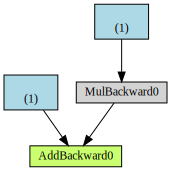

In [26]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)

y_sombrero = a + b * x_entrenamiento_tensor
error = y_entrenamiento_tensor - y_sombrero
perdida = (error ** 2).mean()
make_dot(y_sombrero)

Si llamamos a `make_dot(y_sombrero)` obtendremos el grafo más a la izquierda en la Figura a continuación:

![](../figuras/grafo_dinamico_calculo.png)

Echemos un vistazo más de cerca a sus componentes:

- **cuadros azules**: corresponden a los tensores que utilizamos como parámetros, los que le pedimos a PyTorch que calcule los gradientes;
- **cuadro gris**: una operación de Python que involucra un tensor de calculo de gradiente o sus dependencias;
- **cuadro verde**: igual que el cuadro gris, excepto que es el punto de partida para el cálculo de gradientes (suponiendo que el método `backward()` se llama desde la variable utilizada para visualizar el grafo): se calculan de abajo hacia arriba en un grafico.

Si desplegamos grafo para las variables de `error` (centro) y `perdida` (derecha), la única diferencia entre ellas y la primera es el número de pasos intermedios (recuadros grises).

Ahora, observe más de cerca el cuadro verde del grafo de la izquierda: hay dos flechas apuntando a él, ya que está sumando dos variables, $a$ y $b * x$. Parece obvio, ¿verdad?

Luego, mira el cuadro gris del mismo grafo: está realizando una multiplicación, a saber, $b * x$. ¡Pero solo hay una flecha apuntando a ella! La flecha proviene del cuadro azul que corresponde a nuestro parámetro $b$.

¿Por qué no tenemos un cuadro para nuestros datos $x$? La respuesta es: ¡no calculamos gradientes para ello! Entonces, aunque hay más tensores involucrados en las operaciones realizadas por el grafo de cálculo, solo muestra los tensores de computación en gradiente y sus dependencias.

¿Qué sucedería con el gráfico de cálculo si establece `require_grad` en `False` para nuestro parámetro $a$?

![](../figuras/grafo_dinamico_calculo_2.png)

Como era de esperar, el cuadro azul correspondiente al parámetro $a$ ya no existe. Simplemente: no gradientes, no grafo.

Lo mejor del grafo de computación dinámica es el hecho de que puede hacerlo tan complejo como lo desee. Incluso puede usar declaraciones de flujo de control (por ejemplo, declaraciones if) para controlar el flujo de los gradientes (¡obviamente!) :-)

La Figura a continuación muestra un ejemplo de esto. Y sí, sé que el cálculo en sí mismo es completamente una tontería ...

![](../figuras/grafo_dinamico_calculo_3.png)

### Optimizador

Hasta ahora, hemos estado actualizando manualmente los parámetros utilizando los gradientes calculados. Probablemente esté bien para dos parámetros ... ¡¿pero qué pasaría si tuviéramos muchos?! Utilizamos uno de los optimizadores de PyTorch, como SGD o Adam.

Un optimizador toma los parámetros que queremos actualizar, la tasa de aprendizaje que queremos usar (¡y posiblemente muchos otros hiperparámetros también!) Y realiza las actualizaciones a través de su método `step()`.

Además, ya no necesitamos poner a cero los gradientes uno por uno. ¡Solo invocamos el método `zero_grad()` del optimizador y eso es todo!

En el siguiente código, creamos un optimizador de Descenso de gradiente estocástico (SGD) para actualizar nuestros parámetros $a$ y $b$.

*No se deje engañar por el nombre del optimizador: si utilizamos todos los datos de entrenamiento a la vez para la actualización, como lo estamos haciendo en el código, el optimizador está realizando un descenso de gradiente por lotes, a pesar de su nombre.*

In [27]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
print(a, b)

tasa_aprendizaje = 1e-1
n_epocas = 1000

# Defines a SGD optimizer to update the parameters
optimizador = optim.SGD([a, b], lr=tasa_aprendizaje)

for epoca in range(n_epocas):
    y_sombrero = a + b * x_entrenamiento_tensor
    error = y_entrenamiento_tensor - y_sombrero
    perdida = (error ** 2).mean()

    perdida.backward()    
    
    # No mas actualizaciones manuales!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizador.step()
    
    # No más decirle a PyTorch que deje ir los gradientes!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizador.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


Verifiquemos nuestros dos parámetros, antes y después, solo para asegurarnos de que todo sigue funcionando bien:

>\#ANTES: a, b   
>tensor(\[0.3367\], requires_grad=True)  
>tensor(\[0.1288\], requires_grad=True)  
>\#DESPUES: a, b  
>tensor(\[1.0235\], requires_grad=True)  
>tensor(\[1.9690\], requires_grad=True)

¡Genial! Hemos optimizado el proceso de optimización :-) ¿Qué queda?

### Pérdida

Ahora abordamos el cálculo de pérdidas. Como se esperaba, PyTorch nos cubrió una vez más. Hay muchas funciones de pérdida para elegir, dependiendo de la tarea en cuestión. Como el nuestro es una regresión, estamos utilizando la pérdida del error cuadrático medio (MSE).

*Tenga en cuenta que* `nn.MSELoss` *en realidad crea una función de pérdida para nosotros, NO es la función de pérdida en sí. Además, puede especificar un método de reducción para aplicar, es decir, cómo desea agregar los resultados para puntos individuales: puede promediarlos `(reduction='mean')` o simplemente sumarlos `(reduction='sum')`*.

Luego usamos la función de pérdida creada más adelante, para calcular la pérdida dadas nuestras predicciones y nuestras etiquetas.

Nuestro código se ve así ahora:

In [28]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=dispositivo)
print(a, b)

tasa_aprendizaje = 1e-1
n_epocas = 1000

# Define una funcion de pérdida MSE
perdida_fn = nn.MSELoss(reduction='mean')

optimizador = optim.SGD([a, b], lr=tasa_aprendizaje)

for epoca in range(n_epocas):
    y_sombrero = a + b * x_entrenamiento_tensor
    
    # No mas calculo manual de la pérdida!
    # error = y_tensor - y_sombrero
    # perdida = (error ** 2).mean()
    perdida = perdida_fn(y_entrenamiento_tensor, y_sombrero)

    perdida.backward()    
    optimizador.step()
    optimizador.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


En este punto, solo queda una pieza de código para cambiar: las predicciones. Es hora de presentar la forma en que PyTorch implementa una ...

### Modelo

En PyTorch, un modelo está representado por una clase normal de Python que hereda de la clase `Module`.

Los métodos más fundamentales que necesita implementar son:

- `__init __(self)`: define las partes que componen el modelo, en nuestro caso, dos parámetros, $a$ y $b$.

>Sin embargo, no está limitado a definir parámetros ... los modelos también pueden contener otros modelos (o capas) como sus atributos, por lo que puede anidarlos fácilmente. Veremos un ejemplo de esto en breve también.

- `forward(self, x)`: realiza el cálculo real, es decir, genera una predicción, dada la entrada x.

>Sin embargo, NO debe llamar al método `forward(x)`. Debe llamar a todo el modelo en sí, como en el `modelo(x)` para realizar un pase hacia adelante y predecir la salida.

Construyamos un modelo adecuado (pero simple) para nuestra tarea de regresión. Debe tener un aspecto como este:

In [29]:
class RegresionLinealManual(nn.Module):
    def __init__(self):
        super().__init__()
        # Para hacer que "a" y "b" sean parámetros reales del modelo, necesitamos envolverlos con nn.Parameter
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Calcula las salidas / predicciones
        return self.a + self.b * x

En el método `__init__`, definimos nuestros dos parámetros, $a$ y $b$, usando la clase `Parameter()`, para decirle a PyTorch que estos tensores deben considerarse parámetros del modelo del que son un atributo.

¿Por qué debería importarnos eso? Al hacerlo, podemos usar el método `parameter()` de nuestro modelo para recuperar un iterador sobre todos los parámetros del modelo, incluso aquellos parámetros de modelos anidados, que podemos usar para alimentar nuestro optimizador (¡en lugar de crear una lista de parámetros nosotros mismos!).

Además, podemos obtener los valores actuales para todos los parámetros utilizando el método `state_dict()` de nuestro modelo.

>IMPORTANTE: necesitamos enviar nuestro modelo al mismo dispositivo donde están los datos. Si nuestros datos están hechos de tensores de GPU, nuestro modelo también debe "vivir" dentro de la GPU.

Podemos usar todos estos útiles métodos  para cambiar nuestro código, que debería verse así:

In [30]:
torch.manual_seed(42)

# Ahora podemos crear un modelo y enviarlo de inmediato al dispositivo
modelo = RegresionLinealManual().to(dispositivo)
# También podemos inspeccionar sus parámetros usando su state_dict
print(modelo.state_dict())

tasa_aprendizaje = 1e-1
n_epocas = 1000

perdida_fn = nn.MSELoss(reduction='mean')
optimizador = optim.SGD(modelo.parameters(), lr=tasa_aprendizaje)

for epoca in range(n_epocas):
    # ¡¿Que es esto?!
    modelo.train()

    # No mas predicciones manuales!
    # y_sombrero = a + b * x_tensor
    y_sombrero = modelo(x_entrenamiento_tensor)
    
    perdida = perdida_fn(y_entrenamiento_tensor, y_sombrero)
    perdida.backward()    
    optimizador.step()
    optimizador.zero_grad()
    
print(modelo.state_dict())

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288]))])
OrderedDict([('a', tensor([1.0235])), ('b', tensor([1.9690]))])


Ahora, las declaraciones impresas se verán así: los valores finales para los parámetros ayb siguen siendo los mismos, por lo que todo está bien :-)

>OrderedDict(\[('a', tensor(\[0.3367\], device='cuda:0')), ('b', tensor(\[0.1288\], device='cuda:0'))])  
>OrderedDict(\[('a', tensor(\[1.0235\], device='cuda:0')), ('b', tensor(\[1.9690\], device='cuda:0'))])

Espero que hayas notado una declaración en particular en el código, a la que le asigné un comentario "¿Qué es esto?!" - `modelo.train()`.

>En PyTorch, los modelos tienen un método `train()` que, algo decepcionante, NO realiza un paso de entrenamiento. Su único propósito es establecer el modelo en modo de entrenamiento. ¿Porque es esto importante? Algunos modelos pueden utilizar mecanismos como el *Dropout*, por ejemplo, que tienen comportamientos distintos en las fases de entrenamiento y evaluación.

## Red Neuronal para reconocer los digitos de MNIST 

In [31]:
# Definir una transformación para normalizaz la data
transformacion = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Bajar y cargar la data de entrenamiento 
datos_entrenamiento = datasets.MNIST('../../MNIST_data/', download=True, train=True, transform=transformacion)
datos_validacion = datasets.MNIST('../../MNIST_data/', download=True, train=False, transform=transformacion)
cargador_entrenamiento = torch.utils.data.DataLoader(datos_entrenamiento, batch_size=64, shuffle=True)
cargador_validación = torch.utils.data.DataLoader(datos_validacion, batch_size=64, shuffle=True)

### Explorar la data

Veamos la forma de las imágenes y las etiquetas.

In [32]:
dataiter = iter(cargador_entrenamiento)
imagenes, etiquetas = dataiter.next()
print(type(imagenes))
print(imagenes.shape)
print(etiquetas.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


La forma de las imágenes es, `torch.Size([64,1,28,28])`, lo que sugiere que hay 64 imágenes en cada lote y cada imagen tiene una dimensión de 28 x 28 píxeles. Del mismo modo, las etiquetas tienen forma de `torch.Size([64])`. Las 64 imágenes deben tener 64 etiquetas respectivamente.

Vamos a mostrar una imagen del conjunto de entrenamiento, por ejemplo, la primera.

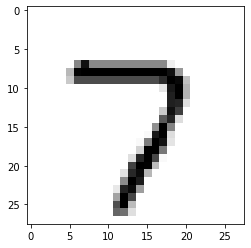

In [33]:
plt.imshow(imagenes[0].numpy().squeeze(), cmap='gray_r');

Esto generará una cuadrícula de imágenes en un orden aleatorio.

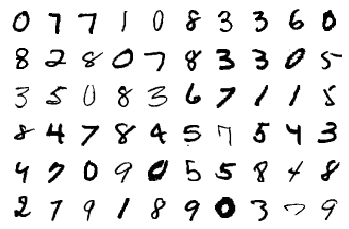

In [34]:
figura = plt.figure()
num_de_imagenes = 60
for index in range(1, num_de_imagenes + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(imagenes[index].numpy().squeeze(), cmap='gray_r')

### Definir La Red Neuronal

Construiremos la siguiente red, ya que puede ver que contiene una capa de entrada (la primera capa), una capa de salida de diez neuronas (o unidades, los círculos) y dos capas ocultas en el medio.

![](../figuras/mlp_mnist.png)

El módulo `torch.nn` de PyTorch nos permite construir la red anterior de manera muy simple.

In [35]:
# Detalles de las capas de la red neuronal
tamaño_entrada = 784
tamaño_ocultas = [128, 64]
tamaño_salida = 10

# Construir la red neuronal
modelo = nn.Sequential(nn.Linear(tamaño_entrada, tamaño_ocultas[0]),
                      nn.ReLU(),
                      nn.Linear(tamaño_ocultas[0], tamaño_ocultas[1]),
                      nn.ReLU(),
                      nn.Linear(tamaño_ocultas[1], tamaño_salida),
                      nn.LogSoftmax(dim=1))
print(modelo)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


El `nn.Secuential` envuelve las capas en la red. Hay tres capas lineales con activación ReLU (una función simple que permite el paso de valores positivos, mientras que los valores negativos se modifican a cero). La capa de salida es una capa lineal con activación `LogSoftmax` porque este es un problema de clasificación.

Técnicamente, una función `LogSoftmax` es el logaritmo de una función `Softmax` como su nombre lo dice y se ve así, como se muestra a continuación.

$$LogSoftMax(x_i)=log\left(\frac{exp(x_i)}{\sum_j exp(x_i)}\right)$$

A continuación, definimos la pérdida de probabilidad logarítmica negativa. La cual es útil para entrenar un problema de clasificación con $C$ clases. Juntas, `LogSoftmax()` y `NLLLoss()` actúan como la pérdida de entropía cruzada como se muestra en el diagrama de arquitectura de red anterior.

Además, debe preguntarse por qué tenemos 784 unidades en la primera capa. ¡Bueno! Es porque aplanamos cada imagen antes de enviarla dentro de la red neuronal. (28 x 28 = 784)

In [36]:
criterio = nn.NLLLoss()
imagenes, etiquetas = next(iter(cargador_entrenamiento))
imagenes = imagenes.view(imagenes.shape[0], -1)

logps = modelo(imagenes)
perdida = criterio(logps, etiquetas)

### Ajuste de pesos

Una red neuronal aprende iterando varias veces sobre los datos disponibles. El término aprender se refieren al ajuste de los pesos de la red para minimizar la pérdida. Vamos a visualizar cómo funciona.

In [37]:
print('Antes del paso hacia atrás : \n', modelo[0].weight.grad)

perdida.backward()

print('Después del paso hacia atrás: \n', modelo[0].weight.grad)

Antes del paso hacia atrás : 
 None
Después del paso hacia atrás: 
 tensor([[-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        ...,
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001]])


In [38]:
from torch import optim

# Optimizadores requieren requieren los parámetros a optimizar
# y la tasa de aprendizaje
optimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)

In [39]:
print('Pesos iniciales - ', modelo[0].weight)

imagenes, etiquetas = next(iter(cargador_entrenamiento))
imagenes.resize_(64, 784)

# Limpiar los gradientes, hacer esto porque los gradientes se acumulan
optimizador.zero_grad()

# Paso hacia adelate, después paso hacia atrás, y luego actualizar los pesos
salida = modelo(imagenes)
perdida = criterio(salida, etiquetas)
perdida.backward()
print('Gradiente -', modelo[0].weight.grad)

Pesos iniciales -  Parameter containing:
tensor([[ 0.0105, -0.0315, -0.0323,  ...,  0.0224,  0.0098,  0.0058],
        [ 0.0026,  0.0204,  0.0326,  ..., -0.0088,  0.0078,  0.0345],
        [ 0.0132, -0.0150,  0.0087,  ...,  0.0101, -0.0190,  0.0026],
        ...,
        [-0.0124, -0.0155,  0.0187,  ...,  0.0155, -0.0157,  0.0257],
        [-0.0182, -0.0258,  0.0084,  ..., -0.0257,  0.0018,  0.0028],
        [ 0.0191, -0.0252, -0.0264,  ...,  0.0268, -0.0224, -0.0237]],
       requires_grad=True)
Gradiente - tensor([[-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        ...,
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001]])


In [40]:
# Tomar un paso de optimización y observar los nuevos pesos
optimizador.step()
print('Pesos actualizados - ', modelo[0].weight)

Pesos actualizados -  Parameter containing:
tensor([[ 0.0105, -0.0315, -0.0323,  ...,  0.0224,  0.0098,  0.0058],
        [ 0.0026,  0.0204,  0.0326,  ..., -0.0088,  0.0078,  0.0345],
        [ 0.0132, -0.0150,  0.0087,  ...,  0.0101, -0.0190,  0.0026],
        ...,
        [-0.0124, -0.0155,  0.0187,  ...,  0.0155, -0.0157,  0.0257],
        [-0.0182, -0.0258,  0.0084,  ..., -0.0257,  0.0018,  0.0028],
        [ 0.0191, -0.0252, -0.0264,  ...,  0.0268, -0.0224, -0.0237]],
       requires_grad=True)


### Entrenamiento de la Red Neuronal

Aquí es donde sucede la magia real. Su red neuronal itera sobre el conjunto de entrenamiento y actualiza los pesos. Hacemos uso de `torch.optim`, que es un módulo proporcionado por PyTorch para optimizar el modelo, realizar el descenso de gradiente y actualizar los pesos mediante la propagación hacia atrás. Por lo tanto, en cada época (número de veces que iteramos sobre el conjunto de entrenamiento), veremos una disminución gradual en la pérdida de entrenamiento.

In [41]:
optimizador = optim.SGD(modelo.parameters(), lr=0.003, momentum=0.9)
tiempo_0 = time()
epocas = 15
for e in range(epocas):
    perdida_actual = 0
    for imagenes, etiquetas in cargador_entrenamiento:
        # Aplanar las imagenes MNIST a un vector de longitud 784
        imagenes = imagenes.view(imagenes.shape[0], -1)
    
        # Paso de entrenamiento
        optimizador.zero_grad()
        
        salida = modelo(imagenes)
        perdida = criterio(salida, etiquetas)
        
        # Aquí es donde el modelo apende mediante la propagación hacia atrás
        perdida.backward()
        
        # Y aquí optimiza sus pesos
        optimizador.step()
        
        perdida_actual += perdida.item()
    else:
        print("Epoca {} - Perdida entrenamiento: {}".format(e, perdida_actual/len(cargador_entrenamiento)))
print("\nTiempo Entrenamiento (en minutos) =",(time()-tiempo_0)/60)


Epoca 0 - Perdida entrenamiento: 0.6351858228842205
Epoca 1 - Perdida entrenamiento: 0.2793898798112295
Epoca 2 - Perdida entrenamiento: 0.2144003163205027
Epoca 3 - Perdida entrenamiento: 0.17215760164598284
Epoca 4 - Perdida entrenamiento: 0.1434965854677469
Epoca 5 - Perdida entrenamiento: 0.1228178322190113
Epoca 6 - Perdida entrenamiento: 0.10816096924821228
Epoca 7 - Perdida entrenamiento: 0.09568168242066813
Epoca 8 - Perdida entrenamiento: 0.08573132533449004
Epoca 9 - Perdida entrenamiento: 0.07864445165893845
Epoca 10 - Perdida entrenamiento: 0.07174939949408984
Epoca 11 - Perdida entrenamiento: 0.06763036986753376
Epoca 12 - Perdida entrenamiento: 0.06088813435909813
Epoca 13 - Perdida entrenamiento: 0.05638287930604396
Epoca 14 - Perdida entrenamiento: 0.05333175350214912

Tiempo Entrenamiento (en minutos) = 3.306777811050415


### Evaluación del Modelo

Ya casi hemos terminado con nuestro trabajo. El modelo está listo, pero primero tenemos que evaluarlo. Crear una función de utilidad ver_clasificacion() para mostrar la imagen y las probabilidades de clase que se predijeron.

In [42]:
def ver_clasificacion(imagen, ps):
    ''' Función para ver una imagen y sus clases predichas.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(imagen.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Probabilidad Clase')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Dígito Predicho = 7


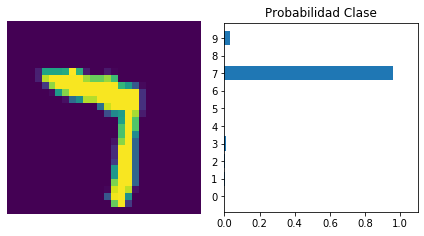

In [43]:
imagenes, etiquetas = next(iter(cargador_validación))

imagen = imagenes[0].view(1, 784)
# Apagar gradientes para acelerar esta parte
with torch.no_grad():
    logps = modelo(imagen)

# Salida de la red son probabilidades logarítmicas, 
# se necesita tomar el exponente para obtener probabilidades
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Dígito Predicho =", probab.index(max(probab)))
ver_clasificacion(imagen.view(1, 28, 28), ps)

### Probar el modelo con los datos de validación

In [44]:
conteo_correcto, conteo_total = 0, 0
for imagenes,etiquetas in cargador_validación:
  for i in range(len(etiquetas)):
    imagen = imagenes[i].view(1, 784)
    # Apagar gradientes para acelerar esta parte
    with torch.no_grad():
        logps = modelo(imagen)

    # Salida de la red son probabilidades logarítmicas, 
    # se necesita tomar el exponente para obtener probabilidades
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    etiqueta_predicha = probab.index(max(probab))
    etiqueta_verdadera = etiquetas.numpy()[i]
    if(etiqueta_verdadera == etiqueta_predicha):
      conteo_correcto += 1
    conteo_total += 1

print("Número de Imágenes Probadas =", conteo_total)
print("\nExactitud del Modelo =", (conteo_correcto/conteo_total))

Número de Imágenes Probadas = 10000

Exactitud del Modelo = 0.9721
